In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\sujat\Downloads\DataSets\Online Payment fraud detection.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [3]:
data1=data.iloc[:200000,[1,2,4,5,7,8,9]]
data1

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.0,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
199995,CASH_IN,149024.27,8688.0,157712.27,440028.59,321427.51,0
199996,PAYMENT,71076.01,50291.0,0.00,0.00,0.00,0
199997,CASH_OUT,147125.05,0.0,0.00,1058502.64,1325544.47,0
199998,CASH_OUT,97529.67,0.0,0.00,1921846.97,2019376.64,0


In [4]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()

In [5]:
data1["type"]=l1.fit_transform(data1["type"])

In [6]:
data1

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.00,0.00,0
1,3,1864.28,21249.0,19384.72,0.00,0.00,0
2,4,181.00,181.0,0.00,0.00,0.00,1
3,1,181.00,181.0,0.00,21182.00,0.00,1
4,3,11668.14,41554.0,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
199995,0,149024.27,8688.0,157712.27,440028.59,321427.51,0
199996,3,71076.01,50291.0,0.00,0.00,0.00,0
199997,1,147125.05,0.0,0.00,1058502.64,1325544.47,0
199998,1,97529.67,0.0,0.00,1921846.97,2019376.64,0


### Data Preprocessing

In [7]:
data1["isFraud"].value_counts()

0    199853
1       147
Name: isFraud, dtype: int64

In [8]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.preprocessing import StandardScaler
s1=StandardScaler()
s2=s1.fit_transform(x)

In [10]:
s2

array([[ 0.89829294, -0.51938749, -0.25740828, -0.26389512, -0.39660605,
        -0.44886454],
       [ 0.89829294, -0.54361551, -0.31123115, -0.31415364, -0.39660605,
        -0.44886454],
       [ 1.63900954, -0.54872908, -0.31884727, -0.32106753, -0.39660605,
        -0.44886454],
       ...,
       [-0.58314025, -0.10233369, -0.3189127 , -0.32106753,  0.04944585,
         0.05033411],
       [-0.58314025, -0.25299749, -0.3189127 , -0.32106753,  0.41325824,
         0.31163057],
       [-0.58314025,  0.09398315, -0.13950711, -0.2195849 , -0.39660605,
        -0.36912029]])

In [11]:
data2=pd.DataFrame(s2)
data2

,0,1,2,3,4,5
0,0.898293,-0.519387,-0.257408,-0.263895,-0.396606,-0.448865
1,0.898293,-0.543616,-0.311231,-0.314154,-0.396606,-0.448865
2,1.639010,-0.548729,-0.318847,-0.321068,-0.396606,-0.448865
3,-0.583140,-0.548729,-0.318847,-0.321068,-0.387680,-0.448865
4,0.898293,-0.513833,-0.303891,-0.310408,-0.396606,-0.448865
...,...,...,...,...,...,...
199995,-1.323857,-0.096564,-0.315772,-0.264817,-0.211178,-0.327815
199996,0.898293,-0.333360,-0.300732,-0.321068,-0.396606,-0.448865
199997,-0.583140,-0.102334,-0.318913,-0.321068,0.049446,0.050334
199998,-0.583140,-0.252997,-0.318913,-0.321068,0.413258,0.311631


In [12]:
x1=data2.iloc[:,:-1].values
y1=y

In [13]:
y1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Data Balancing

In [14]:
from imblearn.over_sampling import SMOTE
r1=SMOTE()
x_data1,y_data1=r1.fit_resample(x,y)

In [15]:
from collections import Counter
print(Counter(y_data1))

Counter({0: 199853, 1: 199853})


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data1,y_data1,test_size=0.2,random_state=10)

### LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression
L1=LogisticRegression()
L1.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred=L1.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)*100
print(acc)

92.3294388431613


### cross-validation

In [20]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=11,shuffle=True)
kf.get_n_splits(x)
print(kf)

KFold(n_splits=5, random_state=11, shuffle=True)


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [22]:
score=cross_val_score(L1,x_train,y_train,cv=kf)*100
y_pred0=cross_val_predict(L1,x_test,y_test)
print(score)
print(np.mean(score))
print("Logistic:",y_pred0)

[92.04572108 92.49917908 92.43663315 92.36939628 92.09094321]
92.28837455926448
Logistic: [1 0 0 ... 0 0 0]


### KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
k1=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
k1.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred1=k1.predict(x_test)
y_pred1

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [25]:
acc=accuracy_score(y_pred1,y_test)*100
print(acc)

99.1181106302069


In [26]:
score1=cross_val_score(k1,x_train,y_train,cv=kf)*100
y_pred2=cross_val_predict(k1,x_test,y_test)
print(score1)
print(np.mean(score1))
print("knn:",y_pred2)


[99.06024737 99.03835629 99.06493831 98.98519225 98.98361271]
99.02646938724598
knn: [1 0 0 ... 0 0 0]


### naive_bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
g1=GaussianNB()
g1.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred2=g1.predict(x_test)
y_pred2

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [29]:
acc2=accuracy_score(y_test,y_pred2)*100
print(acc2)

62.449025543519056


In [30]:
score2=cross_val_score(g1,x_train,y_train,cv=kf)*100
y_pred3=cross_val_predict(g1,x_test,y_test)
print(score2)
print(np.mean(score2))
print("gaussianNB:",y_pred3)

[62.98375369 62.61316905 63.17920973 63.09790002 62.71578684]
62.91796386654837
gaussianNB: [1 1 1 ... 0 1 0]


### RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
r1=RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=5,random_state=11)
r1.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       random_state=11)

In [32]:
y_pred3=r1.predict(x_test)
y_pred3

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
acc3=accuracy_score(y_test,y_pred3)*100
print(acc3)

94.61984939080834


In [34]:
score3=cross_val_score(r1,x_train,y_train,cv=kf)*100
y_pred4=cross_val_predict(r1,x_test,y_test)
print(score3)
print(np.mean(score3))
print("RandomForest:",y_pred4)

[93.92835363 94.40526637 94.59290416 94.4678123  94.75856893]
94.43058107850743
RandomForest: [1 0 0 ... 1 0 0]


### DecisionTree

In [35]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred4=dt.predict(x_test)
y_pred4

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
acc4=accuracy_score(y_pred4,y_test)*100
print(acc4)

99.77233494283355


In [38]:
score4=cross_val_score(dt,x_train,y_train,cv=kf)*100
y_pred5=cross_val_predict(dt,x_test,y_test)
print(score4)
print(np.mean(score4))
print("DecisionTree:",y_pred5)

[99.74825262 99.7670164  99.76076181 99.75607086 99.79515887]
99.76545211376751
DecisionTree: [1 0 0 ... 1 0 0]


### VotingClassifier

In [39]:
from sklearn.ensemble import VotingClassifier
max_vote=VotingClassifier(estimators=[("Logistic",L1),("knn",k1),("Random forest",r1),("navie Bayes",g1),("DesicionTree",dt)])
max_vote.fit(x_train,y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('Random forest',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     n_estimators=10,
                                                     random_state=11)),
                             ('navie Bayes', GaussianNB()),
                             ('DesicionTree', DecisionTreeClassifier())])

In [40]:
y_max_vote=max_vote.predict(x_test)
print(y_max_vote)

[1 0 0 ... 0 0 0]


In [41]:
accuracy =accuracy_score(y_max_vote,y_test)*100
print(accuracy)

97.60201145830727


### BaggingClassifier for Logistic Regression

In [42]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier()
Lbg=BaggingClassifier(base_estimator=L1,n_estimators=10,random_state=0)
Lbg.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), random_state=0)

In [43]:
Lbg_pred=Lbg.predict(x_test)
Lbg_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
Lbg_acc=accuracy_score(y_test,Lbg_pred)*100
print(Lbg_acc)

92.3156788671787


### BaggingClassifier KNeighborsClassifier 

In [45]:
Kbg=BaggingClassifier(base_estimator=k1,n_estimators=10,random_state=0)
Kbg.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0)

In [46]:
Kbg_pred=Kbg.predict(x_test)
Kbg_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [47]:
Kbg_acc=accuracy_score(y_test,Kbg_pred)*100
print(Kbg_acc)

99.14187786144954


### BaggingClassifier GaussianNB

In [48]:
Nbg=BaggingClassifier(base_estimator=g1,n_estimators=10,random_state=0)
Nbg.fit(x_train,y_train)

BaggingClassifier(base_estimator=GaussianNB(), random_state=0)

In [49]:
Nbg_pred=Nbg.predict(x_test)
Nbg_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [50]:
Nbg_acc=accuracy_score(y_test,Nbg_pred)*100
print(Nbg_acc)

62.46153461259413


### BaggingClassifier RandomForestClassifier

In [51]:
Rbg=BaggingClassifier(base_estimator=r1,n_estimators=10,random_state=0)
Rbg.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        n_estimators=10,
                                                        random_state=11),
                  random_state=0)

In [52]:
Rbg_pred=Rbg.predict(x_test)
Rbg_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
Rbg_acc=accuracy_score(y_test,Rbg_pred)*100
print(Rbg_acc)

95.07267769132622


### BaggingClassifier with DecisionTreeClassifier

In [54]:
Dbg=BaggingClassifier(base_estimator=dt,n_estimators=10,random_state=0)
Dbg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

In [55]:
Dbg_pred=Dbg.predict(x_test)
Dbg_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
Dbg_acc=accuracy_score(y_test,Dbg_pred)*100
print(Dbg_acc)

99.83488028820895


### confusion_matrix

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[36561  2467]
 [ 3665 37249]]


In [58]:
import matplotlib.pyplot as plt

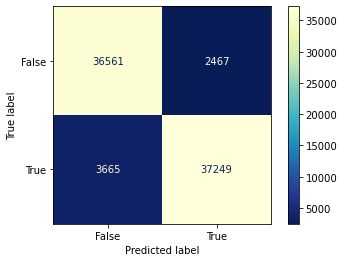

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
confmatrix=confusion_matrix(y_pred,y_test)
cm=ConfusionMatrixDisplay(confmatrix,display_labels=[False,True])
cm.plot(cmap="YlGnBu_r")
plt.show()

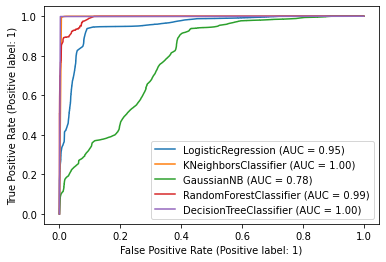

In [60]:
from sklearn.metrics import RocCurveDisplay
ax=plt.gca()
l1Display=RocCurveDisplay.from_estimator(L1,x_test,y_test,ax=ax)
k1Display=RocCurveDisplay.from_estimator(k1,x_test,y_test,ax=ax)
g1Display=RocCurveDisplay.from_estimator(g1,x_test,y_test,ax=ax)
r1Display=RocCurveDisplay.from_estimator(r1,x_test,y_test,ax=ax)
dtDisplay=RocCurveDisplay.from_estimator(dt,x_test,y_test,ax=ax)
plt.show()

<AxesSubplot:title={'center':'Feature Importance'}>

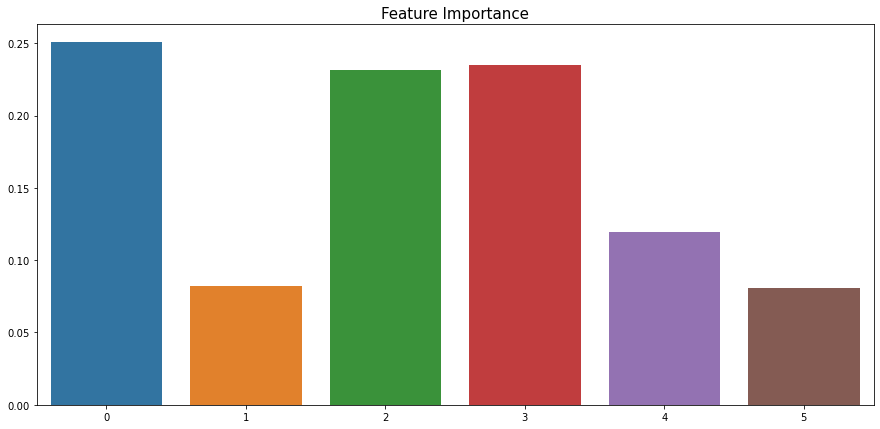

In [61]:
import seaborn as sns
plt.figure(figsize=(15,7))
plt.title("Feature Importance",fontsize=15)
x=list(data2.columns)
sns.barplot(y=r1.feature_importances_,x=x)

### classification_report

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test, target_names=['Not fraud','fraud']))

              precision    recall  f1-score   support

   Not fraud       0.91      0.94      0.92     39028
       fraud       0.94      0.91      0.92     40914

    accuracy                           0.92     79942
   macro avg       0.92      0.92      0.92     79942
weighted avg       0.92      0.92      0.92     79942

